## We will construct a linear model that can predict a car's mileage (mpg) by using its other attributes.

### Data Description:

The dataset has 9 variables, including the name of the car and its various attributes like horsepower, weight, region of origin, etc. Missing values in the data are marked by a series of question marks.

A detailed description of the variables is given below.

1. mpg: miles per gallon
2. cylinders: number of cylinders
3. displacement: engine displacement in cubic inches
4. horsepower: horsepower of the car
5. weight: weight of the car in pounds
6. acceleration: time taken, in seconds, to accelerate from O to 60 mph
7. model year: year of manufacture of the car (modulo 100)
8. origin: region of origin of the car (1 - American, 2 - European, 3 - Asian)
9. car name: name of the car

## Import Libraries


In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Note**: Model performance checking and the associated functions and libraries will be discussed in the video content of Week 2.

## Load and explore the data

**Note**: The code in the next cell will be used for loading data into Google Colab. If running it locally on Jupyter Notebook, this is not necessary. One can just use `cData = pd.read_csv("auto-mpg.csv")`

In [19]:
#from google.colab import files
#import io

#try:
#    uploaded
#except NameError:
#    uploaded = files.upload()

#cData = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))

from google.colab import drive
drive.mount('/content/drive')

cData = pd.read_csv("/content/drive/MyDrive/Learning/PGPDSBA/Week-1-Supervised Learning/auto-mpg.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# let's check the shape of the data
cData.shape

(398, 9)

In [21]:
# let's check the first 5 rows of the data
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
# let's check column types and number of values
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


* Most of the columns in the data are numeric in nature ('int64' or 'float64' type).
* The horsepower and car name columns are string columns ('object' type).


We will be dropping the 'car name' column for prediction purposes.

In [23]:
cData = cData.drop(["car name"], axis=1)

## Dealing with Missing Values

In [24]:
# let's check the statistical summary of the data
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


* The horsepower column is missing from the summary as it is not recognized as a numerical column.
* We will use the [`isdigit()`](https://python-reference.readthedocs.io/en/latest/docs/str/isdigit.html) function to check the values in the horsepower column that are not being recognized as numbers.
  - The `isdigit()` function is an inbuilt function of Python which is used to check whether all characters of a given string are digits or not
  - The function doesn't take any parameter and returns a *True* value only if all the characters of the string are digits, else it returns *False*



In [25]:
hpIsDigit = pd.DataFrame(
    cData.horsepower.str.isdigit()
)  # if the string is made of digits store True else False

# print the entries where isdigit = False
cData[hpIsDigit["horsepower"] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


* We know that '?' denotes missing values.
* We will replace them with NaN. (this will help us deal with the missing values elegantly)

In [26]:
cData = cData.replace("?", np.nan)
cData[hpIsDigit["horsepower"] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


* There are various ways to handle missing values.
* We can drop the rows, replace missing values with the mean/median of the available values, etc.
* Instead of dropping the rows, we will be replacing the missing values with median values.

In [27]:
# let's convert the horsepower column from object type to float type
cData["horsepower"] = cData["horsepower"].astype(float)

In [28]:
# checking column medians
cData.median()

,0
mpg,23.0
cylinders,4.0
displacement,148.5
horsepower,93.5
weight,2803.5
acceleration,15.5
model year,76.0
origin,1.0


In [29]:
# Let's replace the missing values with median values of the columns.
# Note that we do not need to specify the column names below.
# Every column's missing value is replaced with that column's median respectively

# Filter for numeric columns first
numeric_cData = cData.select_dtypes(include=np.number)

medianFiller = lambda x: x.fillna(x.median()) # Remove numeric_only=True
numeric_cData = numeric_cData.apply(medianFiller, axis=0)

# Update the original DataFrame with the filled values
for col in numeric_cData.columns:
    cData[col] = numeric_cData[col]

**Let's replace the origin column values with their actual values.**

In [30]:
cData["origin"] = cData["origin"].replace({1: "america", 2: "europe", 3: "asia"})
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


## Bivariate Analysis

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

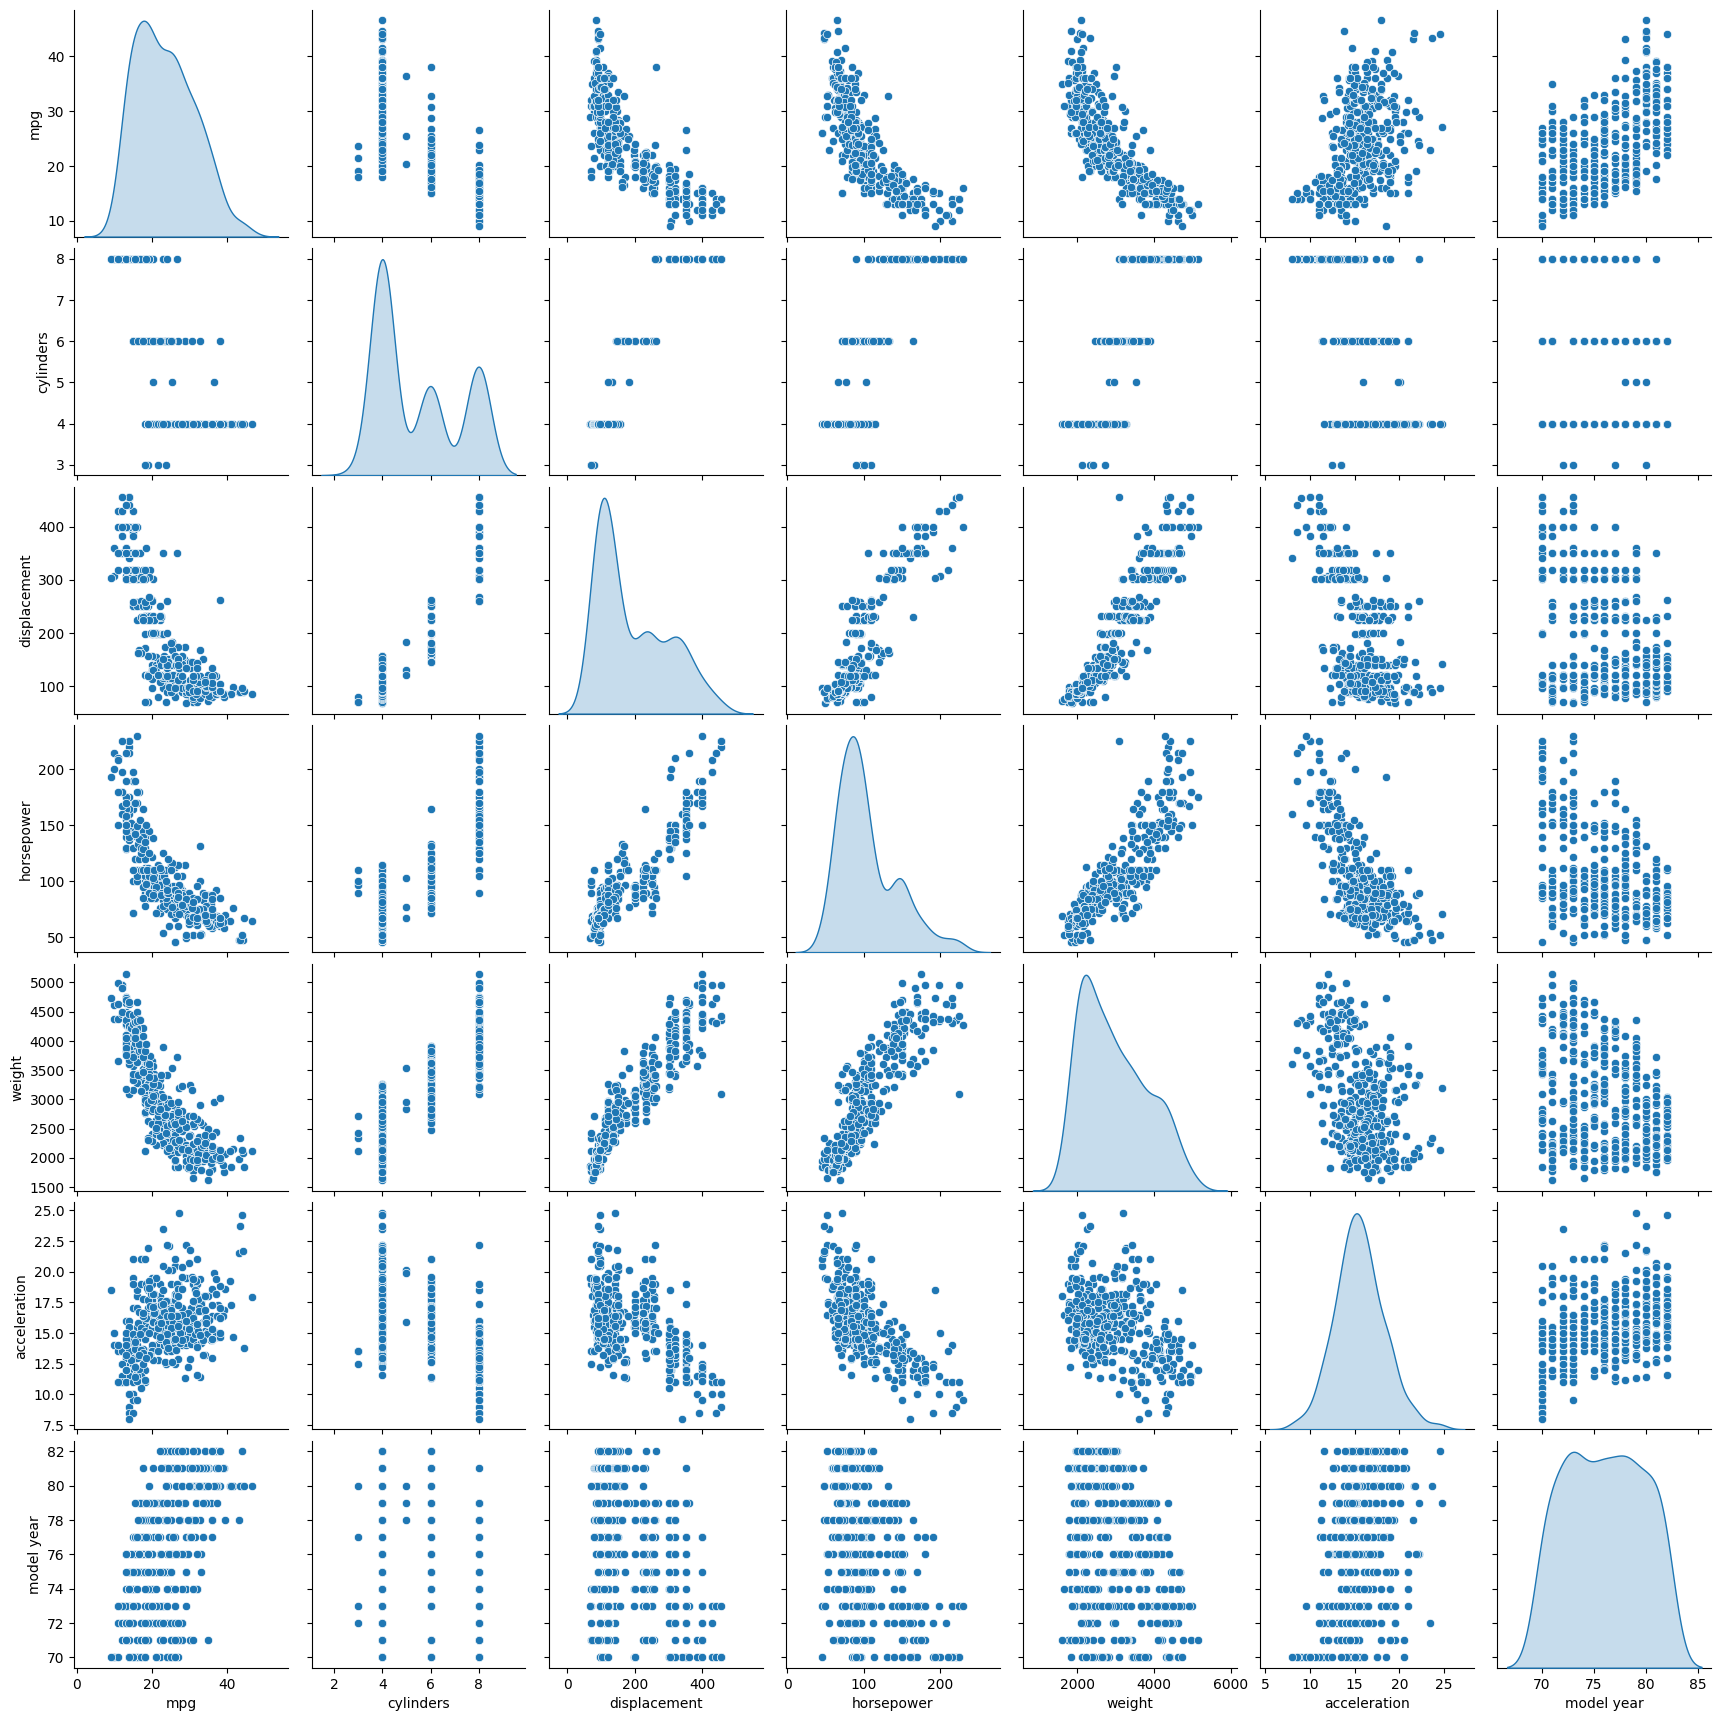

In [ ]:
cData_attr = cData.iloc[:, 0:7]
sns.pairplot(
    cData_attr, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

* Observe that the relationship between 'mpg' and other attributes is not really linear.
* However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern.
* Several assumptions of classical linear regression seem to be violated

## Create Dummy Variables


Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that European cars fall exactly half way between American and Asian cars! We don't want to impose such a baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car American?", "Is this car European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.

We will also be dropping one of those three columns to ensure there is no linear dependency between the three columns.

The pandas [`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function is used to convert a categorical variable to indicator/dummy variables (columns).

- It returns the dummy-coded data as a pandas dataframe
- In general, the `get_dummies()` function is applied to categorical columns in a pandas dataframe to generate dummy (one-hot encoded) columns

The `get_dummies()` function has the following parameters:

`pd.get_dummies(data, columns=['feature_name'], drop_first=True/False)`

where

- `data`: This is the first parameter of the function, and we pass the data that we want to create dummy indicator columns for
- `columns`: This parameter is used to pass the column names in the DataFrame to be encoded. If no value is passed, then the parameter defaults to *None*, in which case all the columns with *object* or *category* type will be converted into dummy variables
- `drop_first`: This parameter takes *True* or *False* as its values and is used to get *k-1* dummies out of *k* categorical levels (sorted in the ascending order of the alphabet) by removing the first level


In [35]:
df=cData.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


In [17]:
# Before get_dummies
cData.sample(5,random_state=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
174,18.0,6,171.0,97.0,2984,14.5,75,america
359,28.1,4,141.0,80.0,3230,20.4,81,europe
250,19.4,8,318.0,140.0,3735,13.2,78,america
274,20.3,5,131.0,103.0,2830,15.9,78,europe
283,20.2,6,232.0,90.0,3265,18.2,79,america


In [18]:
# drop_first=True will drop one of the three origin columns
cData = pd.get_dummies(cData, columns=["origin"], drop_first=True,dtype=int)
cData.sample(5,random_state=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
174,18.0,6,171.0,97.0,2984,14.5,75,0,0
359,28.1,4,141.0,80.0,3230,20.4,81,0,1
250,19.4,8,318.0,140.0,3735,13.2,78,0,0
274,20.3,5,131.0,103.0,2830,15.9,78,0,1
283,20.2,6,232.0,90.0,3265,18.2,79,0,0


### Using OneHotEncoder

In [33]:
# Before OneHotEncoder
df.sample(5,random_state=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
174,18.0,6,171.0,97.0,2984,14.5,75,america
359,28.1,4,141.0,80.0,3230,20.4,81,europe
250,19.4,8,318.0,140.0,3735,13.2,78,america
274,20.3,5,131.0,103.0,2830,15.9,78,europe
283,20.2,6,232.0,90.0,3265,18.2,79,america


In [36]:
from sklearn.preprocessing import OneHotEncoder
# generating a model with first column dropped and output as a dataframe
ohe=OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False).set_output(transform="pandas")
#fit and transform the encoder model to the categorical column
ohe_df=ohe.fit_transform(df[["origin"]])

In [37]:
#concatenate the encoded column to the original df and dropping the categorical column
df=pd.concat([df,ohe_df],axis=1)
df=df.drop(["origin"],axis=1)
df.sample(5,random_state=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
174,18.0,6,171.0,97.0,2984,14.5,75,0.0,0.0
359,28.1,4,141.0,80.0,3230,20.4,81,0.0,1.0
250,19.4,8,318.0,140.0,3735,13.2,78,0.0,0.0
274,20.3,5,131.0,103.0,2830,15.9,78,0.0,1.0
283,20.2,6,232.0,90.0,3265,18.2,79,0.0,0.0


## Split Data

In [ ]:
# independent variables
X = cData.drop(["mpg"], axis=1)
# dependent variable
y = cData[["mpg"]]

In [ ]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,0,0
1,8,350.0,165.0,3693,11.5,70,0,0
2,8,318.0,150.0,3436,11.0,70,0,0
3,8,304.0,150.0,3433,12.0,70,0,0
4,8,302.0,140.0,3449,10.5,70,0,0


In [ ]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)
X.head()

,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,1.0,8,307.0,130.0,3504,12.0,70,0,0
1,1.0,8,350.0,165.0,3693,11.5,70,0,0
2,1.0,8,318.0,150.0,3436,11.0,70,0,0
3,1.0,8,304.0,150.0,3433,12.0,70,0,0
4,1.0,8,302.0,140.0,3449,10.5,70,0,0


**We will now split X and y into train and test sets in a 70:30 ratio. We will use the `train_test_split()` function of sklearn to do the same.**

- sklearn, or Scikit-Learn, is a Python library that offers various features for data processing and modeling tasks
- In order to train a model properly, we need training and test datasets such that the model can be trained using the train data and can be tested on the unseen test data to get a better understandning of how the model is performing.
- If we have only one dataset provided, we'll need to split it into train and test sets by using the sklearn `train_test_split()` function

The sklearn [`test_train_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function has the following parameters:

`train_test_split(X, y, train_size, test_size, random_state)`

where

- `X`, `y`: These are the first parameters of the function, and the set of independent (*X*) and dependent (*y*) variables from the dataset respectively have to be passed to them

- `train_size`: This parameter sets the size of the training dataset. There are three options to set this parameter:
  - *None*, which is the default
  - *int*, which requires the exact number of samples
  - *float*, which ranges from 0 to 1

- `test_size`: This parameter specifies the size of the testing dataset. It takes values similar to `train_size`
  - *int*, which requires the exact number of samples
  - *float*, which ranges from 0 to 1
  - If `train_size` is provided, this parameter sets the size of the test data to complement the training size
  - If the training size is set to default (i.e., *None*), it will be set to 0.25

- `random_state`:  This parameter controls the shuffling process. With the default value of *None*, we get the different train and test sets across different executions as the shuffling process is randomized. By passing a particular value, say 42, to this parameter, we get the same train and test sets across different executions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print(X_train.head())

     cylinders  displacement  horsepower  weight  acceleration  model year  \
350          4         105.0        63.0    2215          14.9          81   
59           4          97.0        54.0    2254          23.5          72   
120          4         121.0       112.0    2868          15.5          73   
12           8         400.0       150.0    3761           9.5          70   
349          4          91.0        68.0    1985          16.0          81   

     origin_asia  origin_europe  
350            0              0  
59             0              1  
120            0              1  
12             0              0  
349            1              0  


In [ ]:
print(X_test.head())

     cylinders  displacement  horsepower  weight  acceleration  model year  \
174          6         171.0        97.0    2984          14.5          75   
359          4         141.0        80.0    3230          20.4          81   
250          8         318.0       140.0    3735          13.2          78   
274          5         131.0       103.0    2830          15.9          78   
283          6         232.0        90.0    3265          18.2          79   

     origin_asia  origin_europe  
174            0              0  
359            0              1  
250            0              0  
274            0              1  
283            0              0  


## Fit Linear Model

We will use the [`OLS()`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) function of the statsmodels library to fit the linear model.

- Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration

- The `OLS()` function of the statsmodels.api module is used to perform OLS (Ordinary Least Squares) regression. It returns an OLS object

- The `fit()` method is called on this object for fitting the regression line to the data

- The `summary()` method is used to obtain a table which gives an extensive description about the regression results

In [ ]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [ ]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.20e-93
Time:                        18:18:33   Log-Likelihood:                -734.21
No. Observations:                 278   AIC:                             1486.
Df Residuals:                     269   BIC:                             1519.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -21.2847      5.679     -3.748

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 81.4% of the variance in the training set.

In [ ]:
y_pred = olsres.predict(X_test)
y_pred.head()

,0
174,20.915545
359,27.786194
250,20.354505
274,26.753004
283,24.344403


### The below was added to compare teh results with Linear_model library from sklearn.
Added by Praveen

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make Predictions on the Training and Test Sets
# Use the trained model to make predictions on both the training and test sets.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
def calculate_mape(y_true, y_pred):
    """
    Calculates the Mean Absolute Percentage Error (MAPE).
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Calculate Evaluation Metrics for Training Set
# Calculate the metrics to assess the model's performance on the training data.
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
mape_train = calculate_mape(y_train, y_train_pred)

In [ ]:
# Calculate Evaluation Metrics for Test Set
# Calculate the metrics to assess the model's performance on the test data.
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape_test = calculate_mape(y_test, y_test_pred)

In [ ]:
# Print the Metrics - using Pandas DataFrame
# Create a Pandas DataFrame to display the metrics for easy comparison.
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared', 'Adjusted R-squared', 'MAPE'],
    'Training Set': [mae_train, mse_train, rmse_train, r2_train, adjusted_r2_train, mape_train],
    'Testing Set': [mae_test, mse_test, rmse_test, r2_test, adjusted_r2_test, mape_test]
})

metrics_df

,Metric,Training Set,Testing Set
0,MAE,2.653321,2.354281
1,MSE,11.521429,9.160980
2,RMSE,3.394323,3.026711
3,R-squared,0.814103,0.843314
4,Adjusted R-squared,0.808574,0.832021
5,MAPE,12.445607,11.147284


In [ ]:
# Display the Regression Equation
# Get the coefficients and intercept from the trained model.
intercept = model.intercept_[0]
coefficients = model.coef_[0]

# Format the equation as a string.
equation = f"y = {intercept:.2f}"  # Start with the intercept
for i, coef in enumerate(coefficients):
    equation += f" + {coef:.2f} * x_{i+1}"  # Add each coefficient and its corresponding x variable

print("\nRegression Equation:")
print(equation)


Regression Equation:
y = -21.28 + -0.39 * x_1 + 0.03 * x_2 + -0.02 * x_3 + -0.01 * x_4 + 0.06 * x_5 + 0.84 * x_6 + 2.40 * x_7 + 3.00 * x_8
